# Coursework Two - Group Project

This coursework is a complete project that you need to undertake by yourself. The dataset for this project is a Lending Club dataset (in a pkl format) available to you in the "Coursework 2: Files and Specific Instructions" on moodle. Similar datasets are available on Kaggle or other repositories, but for this coursework, use the dataset on moodle. Please note that this dataset is only for educational purposes and must not be used for any other means. This dataset is provided in a compressed format on moodle; you can unzip the dataset on your hard drive and read the unzipped version. At the end of this notebook, instructions for loading the dataset are provided. The dataset has been cleaned and pre-processed.

The main objectives of this coursework are to build two investment strategies for a potential investor who wants to invest in the lending club platform. 

Your first investment strategy is based on maximizing return. In order to do that, you need to define what return means in this context and how it is calculated. In the dataset, you will find five columns named "ret_PESS, ret_OPT, ret_INTa, ret_INTb, ret_INTc". These are some calculated returns based on some definitions, and you must not use them in your analysis. You need to come up with (a) definition(s) of return and justify it, i.e. why you have chosen this definition of return. Note that there could be more than one definition of return. The aim of this investment strategy is to build a portfolio that achieves high returns. 

Your second investment strategy is based on minimizing default. In order to do this, you need a predictive default model that we have done several times in our module. The aim of this investment strategy is to build a portfolio that achieves the minimum default.

Ultimately, for a given natural number $N$, your methodology comes up with two portfolios made of $N$ loans, one based on the first investment strategy, achieving the highest return, and the other based on the second strategy, achieving the minimum default risk  where you will clarify the precise meanings of 'return' and 'default'.

For each investment strategy, you will need to build two predictive models, and of these two models for each investment strategy, one of them must be an artificial neural network (ANN). You will need to discuss why you have selected these models and conduct a comparative analysis between these models and the random strategy benchmark (which is explained below). As usual, you will need to specify the explanatory variables and a target one. So in total, you will need two ANNs, one for each investment strategy, and no logistic regression must be used. To simplify your analysis, for the ANNs, only use one hidden layer with relu activation function for all nodes, however, you will need to tune for the optimal number of neurons in the hidden layer. For the number of hidden neurons in the hidden layer, you can consider the range $[1, 100]$.


Your report should be structured in this Jupyter notebook as follows:

1) Introduction 

2) Data Exploration 

3) Investment Strategy Based on Return Maximizing

4) Investment Strategy Based on Default Minimization

5) Experiments and Results

6) Conclusions 

7) Acknowledgment

8) References

9) Appendices

All the codes must go into the appendix, and all the project must be present in this single notebook. You cannot upload two separate files.  In Sections 3 and 4, you will explain your methodology. In Section 5, you will provide the experiments details,  explain the results, and the implications of your findings.  Discuss limitations of your analysis and possible suggestions to improve it. Please provide a summary of the performances of the two strategies and benchmark them against a random strategy.  A random strategy is basically an investment approach in which the loans are picked completely randomly. Explore the role of $N$ in the results. 

In order to get the credit, you need to show your full work with detailed investigations and analysis. You can support your analysis with diagrams, formulas, figures, tables, etc. Your models must be legit and follow the  usual rigour of a data analytic project.  

Your appendices that contain the python codes must be well-organized and easy to follow. Within the main body of the report, you can make appropriate references to the relevant sections of the code to support you claims and experiments. 

The total number of words for the report must not exceed 4000 where programming codes, the content of the appendices and possible formulas, figures, tables, are not considered as words, and hence are not counted in the word counts. The appendices should be divided by sections corresponding to each phase of your analysis for easier navigation and reference. You can easily create tables in Jupyter such as the following two examples:

 Table 1 example:
 
 | | Loan #  | Term Type    | Initial amount   | Initial rate   |
|---:|:-------------|:-----------|:------|:------|
| 1 | Loan: 1  | Short term       | 10k   | 10%     |
| 2 | Loan: 2  | Long term    | 30k   | 1%     |



In the acknowledgment section (50 words MAX): If you have used any large language model (LLM), please do acknowledge here and specify in which capacity you have used these models. You will not be penalized for using these models towards your solutions. However, your solution should not be entirely a copy-paste from an LLM model.


# Marking Allocation

Section 3. [30%]

Section 4. [30%]

Section 5. [20%]

All the other sections (including the appendices), overall report structure, quality of the writing, referencing, and presentation. [20%]

The main criteria of marking for Sections 3, 4, 5 are model design, novelty, independent thought, methodology, reasoning. For the data exploration section, use or explore visualizations that help understanding your overall methodology and work. All figures and tables must be clearly labelled and referenced in the text. 

It is important to note that that these marking criteria are interconnected, for instance, you might have a very good methodology in Sections 3, 4, but if it is badly explained and not understandable for the marker, they will have no choice but to deduct marks.

You can use any standard references; just try to be consistent.
 
# Further Instructions

One submission will be allowed per group, and unless otherwise stated, the submission will be done by the group lead. Further instructions will be announced in due course. 

All group members will receive the same mark. However, note that your submission will include a breakdown of each member’s contribution. Please provide a table in the Acknowledgment section of your report, with the names of the members and how they have contributed into the project. A group MAY be asked for a face to face meeting to explain their project and results, in whch case, all members must be present.


# Assessment Criteria

Please see "HEQF Level 7 Masters Level" of this document: https://www.ucl.ac.uk/teaching-learning/sites/teaching-learning/files/migrated-files/UCL_Assessment_Criteria_Guide.pdf


# FAQ
1. How many words, should I allocate for each section? As a guidline, you may allocate the number of words based on the weight of each section. For instance, Section 4 has 30\%, so roughly I would use $0.3\times 4000 = 1200$ words on this section.

# Appendices

In [22]:
# load libraries and utilities
import pickle
import zipfile
with zipfile.ZipFile("lending_club_dataset (2).zip", 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")
import pandas
import pandas as pd



In [23]:
# Loading the dataset

# with open("lending_club_dataset (2).zip", 'rb') as file:
    # data, discrete_features, continuous_features = pickle.load(file)

import pickle

with open("unzipped_data/lending_club_dataset.pickle", "rb") as file:
    data, discrete_features, continuous_features = pickle.load(file)

In [24]:
pd.set_option('display.max_columns', None)
data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,fico_range_high,fico_range_low,revol_bal,revol_util,total_pymnt,last_pymnt_d,recoveries,loan_length,term_num,ret_PESS,ret_OPT,ret_INTa,ret_INTb,ret_INTc
0,40390412,5000.0,5000.0,36 months,12.39,167.01,C,< 1 year,RENT,48000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,14.25,0.0,2010-07-01,7.0,0.0,674.0,670.0,5994.0,44.4,5475.14000,2015-12-01,0.0,10.973531,36,0.031676,0.103917,0.031155,0.050634,0.086751
2,40401108,17000.0,17000.0,36 months,12.39,567.82,C,1 year,RENT,53000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,21.31,0.0,2006-09-01,12.0,0.0,684.0,680.0,14690.0,73.1,20452.09912,2018-03-01,0.0,37.947391,36,0.067688,0.064215,0.050574,0.066334,0.094950
3,40501689,9000.0,9000.0,36 months,14.31,308.96,C,6 years,RENT,39000.0,Source Verified,2015-01-01,Fully Paid,credit_card,24.80,0.0,1982-11-01,10.0,0.0,719.0,715.0,26172.0,77.7,9792.56000,2015-11-01,0.0,9.987885,36,0.029354,0.105803,0.029798,0.049345,0.085622
4,40352737,14000.0,14000.0,36 months,11.99,464.94,B,6 years,RENT,44000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,18.41,0.0,2001-04-01,11.0,0.0,664.0,660.0,14330.0,34.8,16592.91130,2018-01-01,0.0,36.008953,36,0.061736,0.061721,0.047093,0.063007,0.091937
5,40431323,10000.0,10000.0,60 months,19.24,260.73,E,10+ years,MORTGAGE,130000.0,Verified,2015-01-01,Fully Paid,debt_consolidation,13.73,0.0,1999-03-01,12.0,0.0,709.0,705.0,5947.0,44.1,15122.07997,2018-10-01,0.0,44.978336,60,0.102442,0.136655,0.113866,0.131897,0.164518


In [25]:
data.columns
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605374 entries, 0 to 1048541
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   605374 non-null  object 
 1   loan_amnt            605374 non-null  float64
 2   funded_amnt          605374 non-null  float64
 3   term                 605374 non-null  object 
 4   int_rate             605374 non-null  float64
 5   installment          605374 non-null  float64
 6   grade                605374 non-null  object 
 7   emp_length           567483 non-null  object 
 8   home_ownership       605374 non-null  object 
 9   annual_inc           605374 non-null  float64
 10  verification_status  605374 non-null  object 
 11  issue_d              605374 non-null  object 
 12  loan_status          605374 non-null  object 
 13  purpose              605374 non-null  object 
 14  dti                  605374 non-null  float64
 15  delinq_2yrs     

In [26]:
# Get list of discrete and continuous features
discrete_features = []
continuous_features = []
for column in data.columns:
    if data[column].dtype == 'object':
        discrete_features.append(column)
    else:
        continuous_features.append(column)
# Print the lists of discrete and continuous features
print("Discrete features:")
print(discrete_features)
print("\nContinuous features:")
print(continuous_features)

# check for categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:")
print(categorical_features)

Discrete features:
['id', 'term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'last_pymnt_d']

Continuous features:
['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'fico_range_high', 'fico_range_low', 'revol_bal', 'revol_util', 'total_pymnt', 'recoveries', 'loan_length', 'term_num', 'ret_PESS', 'ret_OPT', 'ret_INTa', 'ret_INTb', 'ret_INTc']
Categorical features:
['id', 'term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'last_pymnt_d']


In [27]:
data.describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,fico_range_high,fico_range_low,revol_bal,revol_util,total_pymnt,recoveries,loan_length,term_num,ret_PESS,ret_OPT,ret_INTa,ret_INTb,ret_INTc
count,605374.000000,605374.000000,605374.00000,605374.000000,6.053740e+05,605374.000000,605374.000000,605374.000000,605374.000000,605374.000000,605374.000000,6.053740e+05,605374.000000,605374.000000,605374.000000,605374.000000,605374.000000,605374.000000,605374.000000,605374.000000,605374.000000,605374.000000
mean,14552.362506,14552.362506,12.69876,439.151480,7.687993e+04,18.969691,0.338577,11.846685,0.239870,699.438314,695.438159,1.657829e+04,50.717241,14601.370444,254.129004,20.106174,41.682464,0.005759,0.045801,0.012465,0.028547,0.058141
std,8795.106114,8795.106114,4.77739,262.995589,7.277882e+04,11.783039,0.920335,5.676809,0.641496,31.856039,31.855308,2.359003e+04,24.453887,10175.431179,982.899170,11.594011,10.202397,0.082310,0.107628,0.060556,0.064719,0.072475
min,1000.000000,1000.000000,5.31000,14.010000,1.600000e+01,-1.000000,0.000000,1.000000,0.000000,664.000000,660.000000,0.000000e+00,0.000000,17.580000,0.000000,0.919937,36.000000,-0.333083,-0.333083,-0.199841,-0.199827,-0.199801
25%,8000.000000,8000.000000,9.17000,248.442500,4.571275e+04,12.190000,0.000000,8.000000,0.000000,674.000000,670.000000,5.856000e+03,32.300000,6704.651477,0.000000,10.020740,36.000000,0.009038,0.036616,0.018124,0.037480,0.071395
50%,12000.000000,12000.000000,12.29000,373.920000,6.500000e+04,18.200000,0.000000,11.000000,0.000000,694.000000,690.000000,1.103700e+04,50.600000,11909.215060,0.000000,18.990123,36.000000,0.032468,0.068647,0.031701,0.049552,0.082138
75%,20000.000000,20000.000000,15.59000,583.890000,9.181350e+04,24.980000,0.000000,15.000000,0.000000,714.000000,710.000000,1.985600e+04,69.300000,20320.256235,0.000000,31.047865,36.000000,0.051713,0.105569,0.045422,0.063087,0.095792
max,40000.000000,40000.000000,30.99000,1719.830000,9.550000e+06,999.000000,39.000000,90.000000,86.000000,850.000000,845.000000,2.904836e+06,193.000000,61184.573800,35581.880000,49.939424,60.000000,0.180332,1.628427,0.171967,0.194177,0.234413


In [91]:
# check for categorical features
categorical_features = data.select_dtypes(include=['object']).columns
print("Categorical features:")      
print(categorical_features)

Categorical features:
Index(['grade', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose'],
      dtype='object')


In [28]:
# check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]
# check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


/var/folders/77/_kt9jzln7q534hj1tv0jfs680000gn/T/ipykernel_1668/246421813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


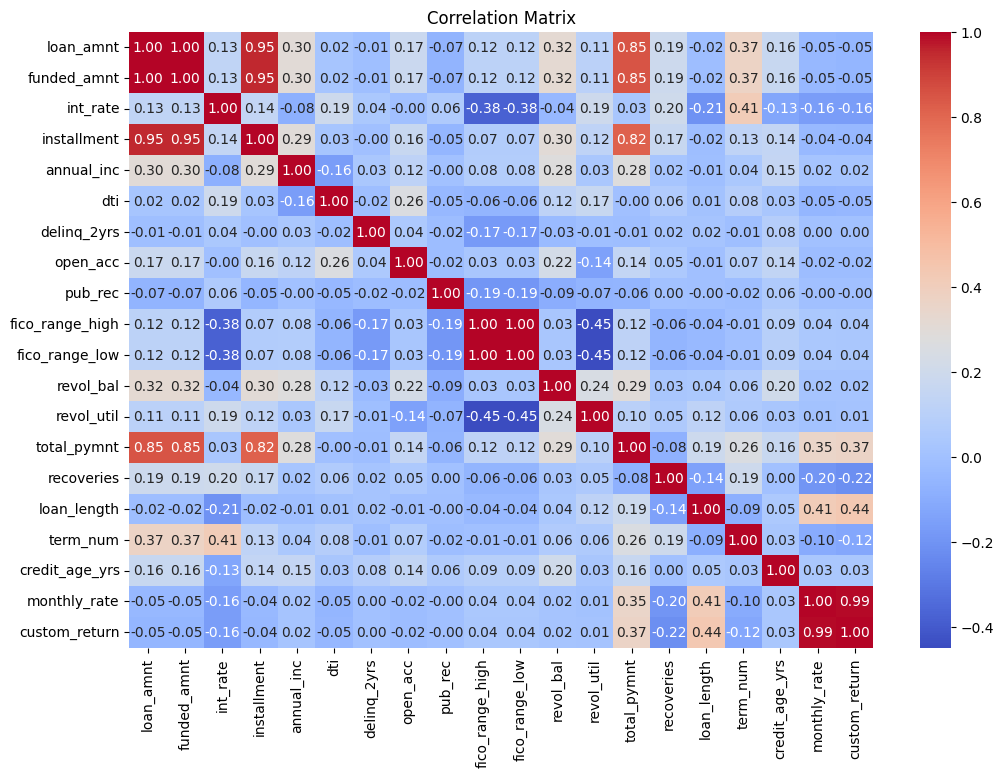

In [92]:
# check for correlation
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [95]:
# remove highly correlated features
threshold = 0.9
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print("Correlated features:")   
print(correlated_features)

Correlated features:
{'custom_return', 'fico_range_low', 'funded_amnt', 'installment'}


In [97]:
# remove columns with more than 50% missing values
missing_threshold = 0.5
missing_columns = data.isnull().mean()
columns_to_remove = missing_columns[missing_columns > missing_threshold].index
data = data.drop(columns=columns_to_remove)
data.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec',
       'fico_range_high', 'fico_range_low', 'revol_bal', 'revol_util',
       'total_pymnt', 'recoveries', 'loan_length', 'term_num',
       'credit_age_yrs', 'monthly_rate', 'custom_return'],
      dtype='object')

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
#check for outliers

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column} -- Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    return outliers
continuous_features= data.select_dtypes(include=['float64', 'int64']).columns

outliers = detect_outliers(data, continuous_features)

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'fico_range_high',
       'fico_range_low', 'revol_bal', 'revol_util', 'total_pymnt',
       'recoveries', 'loan_length', 'credit_age_yrs', 'monthly_rate',
       'custom_return'],
      dtype='object') -- Lower Bound: loan_amnt         -10000.000000
funded_amnt       -10000.000000
int_rate              -0.190000
installment         -258.995000
annual_inc        -21000.000000
dti                   -6.855000
delinq_2yrs            0.000000
open_acc              -2.500000
pub_rec                0.000000
fico_range_high      614.000000
fico_range_low       610.000000
revol_bal         -15260.000000
revol_util           -22.900000
total_pymnt       -13801.953074
recoveries             0.000000
loan_length          -21.470667
credit_age_yrs        -1.957563
monthly_rate          -0.003767
custom_return         -0.046681
dtype: float64, Upper Bound: loan_amnt       

In [31]:
# How many outliers each column has 
for col in continuous_features:
    outliers = detect_outliers(data, col)
    print(f"{col} — Outliers found: {len(outliers)}")


loan_amnt -- Lower Bound: -10000.0, Upper Bound: 38000.0
loan_amnt — Outliers found: 3457
funded_amnt -- Lower Bound: -10000.0, Upper Bound: 38000.0
funded_amnt — Outliers found: 3457
int_rate -- Lower Bound: -0.4599999999999991, Upper Bound: 25.22
int_rate — Outliers found: 11796
installment -- Lower Bound: -254.72875, Upper Bound: 1087.06125
installment — Outliers found: 18771
annual_inc -- Lower Bound: -23438.375, Upper Bound: 160964.625
annual_inc — Outliers found: 28112
dti -- Lower Bound: -6.995000000000003, Upper Bound: 44.165000000000006
dti — Outliers found: 2645
delinq_2yrs -- Lower Bound: 0.0, Upper Bound: 0.0
delinq_2yrs — Outliers found: 122227
open_acc -- Lower Bound: -2.5, Upper Bound: 25.5
open_acc — Outliers found: 15760
pub_rec -- Lower Bound: 0.0, Upper Bound: 0.0
pub_rec — Outliers found: 111948
fico_range_high -- Lower Bound: 614.0, Upper Bound: 774.0
fico_range_high — Outliers found: 20621
fico_range_low -- Lower Bound: 610.0, Upper Bound: 770.0
fico_range_low — O

In [32]:
# Check for catagorical features - need to one-hot encode them
catagorical_features = data.select_dtypes(include=['object']).columns
print('categorical_features')
print(catagorical_features)

categorical_features
Index(['id', 'term', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'last_pymnt_d'],
      dtype='object')


In [33]:
import pandas as pd

# Remove the irrelevant catagorical columns 
cols_to_drop = ['id', 'issue_d', 'earliest_cr_line', 'last_pymnt_d']
data_cleaned = data.drop(columns=cols_to_drop)

# One-hot encode the remaining categorical columns
categorical_to_encode = ['term', 'grade', 'emp_length', 'home_ownership', 
                         'verification_status', 'loan_status', 'purpose']

# Apply one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_to_encode, drop_first=True)

# show the new sample with dropped data 
print(data_encoded.head())
print(data_encoded.columns) 




   loan_amnt  funded_amnt  int_rate  installment  annual_inc    dti  \
0     5000.0       5000.0     12.39       167.01     48000.0  14.25   
2    17000.0      17000.0     12.39       567.82     53000.0  21.31   
3     9000.0       9000.0     14.31       308.96     39000.0  24.80   
4    14000.0      14000.0     11.99       464.94     44000.0  18.41   
5    10000.0      10000.0     19.24       260.73    130000.0  13.73   

   delinq_2yrs  open_acc  pub_rec  fico_range_high  fico_range_low  revol_bal  \
0          0.0       7.0      0.0            674.0           670.0     5994.0   
2          0.0      12.0      0.0            684.0           680.0    14690.0   
3          0.0      10.0      0.0            719.0           715.0    26172.0   
4          0.0      11.0      0.0            664.0           660.0    14330.0   
5          0.0      12.0      0.0            709.0           705.0     5947.0   

   revol_util  total_pymnt  recoveries  loan_length  term_num  ret_PESS  \
0        44

In [35]:
# Dropping previous return metric columns
data = data.drop(columns=['term','ret_PESS','ret_OPT','ret_INTa', 'ret_INTb','ret_INTc','id','last_pymnt_d'])

# Drop missing value columns 
data = data.dropna(subset=['emp_length'])

In [101]:
# Define Return definition 

# 1. Estimate the implied constant monthly rate:
data['monthly_rate'] = ((data['total_pymnt'] + data['recoveries']) / data['loan_amnt']) ** (1 / data['term_num']) - 1

# Annualise that monethly rate:
data['custom_return'] = (1 + data['monthly_rate']) ** 12 - 1
print("Custom return:")
print(data['custom_return'].describe())
data['custom_return']

Custom return:
count    567483.000000
mean          0.000052
std           0.099808
min          -0.900000
25%           0.010858
50%           0.031879
75%           0.049218
max           0.304420
Name: custom_return, dtype: float64


0          0.030722
2          0.063562
3          0.028532
4          0.058274
5          0.086231
             ...   
1048430    0.029237
1048442    0.011465
1048471    0.027698
1048488    0.006056
1048541    0.016220
Name: custom_return, Length: 567483, dtype: float64

In [ ]:
X = data.drop(columns=['custom_return'])  # Features
y = data['custom_return'] # your target


In [102]:
from sklearn.model_selection import train_test_split

# Define features
numerical = ["loan_amnt", "funded_amnt", "installment", "int_rate", "annual_inc", "loan_length", "term_num"]
categorical = ["home_ownership", "grade", "emp_length"]
features = numerical + categorical
target = "custom_return_1"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
])

In [130]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=1)


In [131]:
from sklearn.pipeline import Pipeline

# Wrap preprocessing and model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", rf)
])
# Fit model and training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'installment', 'int_rate',
                                                   'annual_inc', 'loan_length',
                                                   'term_num']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['home_ownership', 'grade',
                                                   'emp_length'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=50, n_jobs=1,
                                       random_state=42))])

In [128]:
X_train.select_dtypes(include=['object']).columns


Index(['grade', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose'],
      dtype='object')

In [127]:
# Split
df = data_encoded
df_sample = df.sample(n=50, random_state=42)
X = df_sample[features]
y = df_sample["custom_return"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['home_ownership', 'grade', 'emp_length'] not in index"

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
X = df.drop(columns=["target_column"])  # replace "target_column" with your actual target
y = df["target_column"]


KeyError: "['target_column'] not found in axis"

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object', 'category']).columns.tolist()


In [122]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
])


In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=50, random_state=42))
])

rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'installment', 'int_rate',
                                                   'annual_inc', 'loan_length',
                                                   'term_num']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['home_ownership', 'grade',
                                                   'emp_length'])])),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

In [120]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📉 MSE:", mse)
print("📈 R² Score:", r2)

# APPARENTLY THESE LOOK QUITE LOW, ESPECIALLY THE R SWUARED, LOOK AT MORE FEATURE ENGINEERING TO MAKE MORE ROBUST 


NameError: name 'rf_pipeline' is not defined

In [51]:
data['recoveries'].unique()

array([   0.  , 1070.96,  219.61, ..., 1383.25, 4277.18,  626.92])

In [119]:
# Define Return definition 

# 1. Estimate the implied constant monthly rate:
data['monthly_rate'] = ((data['total_pymnt'] + data['recoveries']) / data['loan_amnt']) ** (1 / data['term_num']) - 1

# Annualise that monethly rate:
data['custom_return'] = (1 + data['monthly_rate']) ** 12 - 1
print("Custom return:")
print(data['custom_return'].describe())
data['custom_return']

Custom return:
count    567483.000000
mean          0.000052
std           0.099808
min          -0.900000
25%           0.010858
50%           0.031879
75%           0.049218
max           0.304420
Name: custom_return, dtype: float64


0          0.030722
2          0.063562
3          0.028532
4          0.058274
5          0.086231
             ...   
1048430    0.029237
1048442    0.011465
1048471    0.027698
1048488    0.006056
1048541    0.016220
Name: custom_return, Length: 567483, dtype: float64

In [118]:
from sklearn.model_selection import train_test_split

# Define features
numerical = ["loan_amnt", "funded_amnt", "installment", "int_rate", "annual_inc", "loan_length", "term_num"]
categorical = ["home_ownership", "grade", "emp_length"]
features = numerical + categorical
target = "custom_return"

# Split
df_sample = df.sample(n=50, random_state=42)
X = df_sample[features]
y = df_sample["custom_return"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['home_ownership', 'grade', 'emp_length'] not in index"

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle

models = {
    "Lasso": Lasso(alpha=0.01, max_iter=10000),
    "RandomForest": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42),
}


results = {}
for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    results[name] = {
        "MSE": mean_squared_error(y_test, preds),
        "R2": r2_score(y_test, preds)
    }

# Random Guessing Baseline
random_preds = shuffle(y_test.copy(), random_state=42)
results["RandomGuessing"] = {
    "MSE": mean_squared_error(y_test, random_preds),
    "R2": r2_score(y_test, random_preds)
}

In [115]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R²:  {metrics['R2']:.4f}\\n")

Model: Lasso
  MSE: 0.0082
  R²:  0.1810\n
Model: RandomForest
  MSE: 0.0075
  R²:  0.2543\n
Model: RandomGuessing
  MSE: 0.0199
  R²:  -0.9900\n


In [68]:
from sklearn.tree import DecisionTreeClassifier
clf_mst = DecisionTreeClassifier(class_weight="balanced", random_state=42, max_depth=3,\
                                 min_samples_split=10,\
                                           min_samples_leaf=3).fit(x_train,y_train)
clf_mst_score = clf_mst.score(x_test,y_test)

#------------------------------------
clf_mst_score

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [114]:
#model_single_tree
mst = DecisionTreeClassifier(random_state=0, criterion='gini') # You could try "entropy" for the criterion as well
#Fiiting and calculating the score of the model_single_tree. You can observe how overfitting the tree models are
mst.fit(x_train, y_train)
print(f"Score of the model on the training data: {mst.score(x_train, y_train)}")

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
# 42 picked as it is norm
seed=42

In [55]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)


In [63]:
# Splitting data set into 80/20 split - 80% trainging and 20% testing
# Define full dataset
X = data_encoded.drop(columns=['custom_return'])
y = data_encoded['custom_return']  # lowercase y here

# Perform 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


In [47]:
data.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,fico_range_high,fico_range_low,revol_bal,revol_util,total_pymnt,recoveries,loan_length,term_num,custom_return,credit_age_yrs
0,5000.0,5000.0,12.39,167.01,C,< 1 year,RENT,48000.0,Not Verified,Fully Paid,debt_consolidation,14.25,0.0,7.0,0.0,674.0,670.0,5994.0,44.4,5475.14000,0.0,10.973531,36,0.095028,4.503765
2,17000.0,17000.0,12.39,567.82,C,1 year,RENT,53000.0,Not Verified,Fully Paid,debt_consolidation,21.31,0.0,12.0,0.0,684.0,680.0,14690.0,73.1,20452.09912,0.0,37.947391,36,0.203065,8.334018
3,9000.0,9000.0,14.31,308.96,C,6 years,RENT,39000.0,Source Verified,Fully Paid,credit_card,24.80,0.0,10.0,0.0,719.0,715.0,26172.0,77.7,9792.56000,0.0,9.987885,36,0.088062,32.167009
4,14000.0,14000.0,11.99,464.94,B,6 years,RENT,44000.0,Not Verified,Fully Paid,debt_consolidation,18.41,0.0,11.0,0.0,664.0,660.0,14330.0,34.8,16592.91130,0.0,36.008953,36,0.185208,13.752225
5,10000.0,10000.0,19.24,260.73,E,10+ years,MORTGAGE,130000.0,Verified,Fully Paid,debt_consolidation,13.73,0.0,12.0,0.0,709.0,705.0,5947.0,44.1,15122.07997,0.0,44.978336,60,0.512208,15.838467


In [22]:
# Filtering data to reflect only fully repaid loans
df = df[df['loan_status'] == 'Fully Paid'].copy()


In [23]:
import sys
!{sys.executable} -m pip install scikit-learn

zsh:1: no such file or directory: /Users/owenbabingtonellis/Desktop/AI


In [24]:
import sklearn
print(sklearn.__version__)


1.6.1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# --- Feature engineering ---
df['term'] = df['term'].str.extract('(\d+)').astype(int)  # "36 months" -> 36
df['emp_length'] = df['emp_length'].replace({
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    'n/a': np.nan
}).fillna(0)

df['fico_avg'] = (df['fico_range_low'] + df['fico_range_high']) / 2


In [ ]:
# Making sure to include that only loans that are fully repaid are used 
df = df[df['loan_status'] == 'Fully Paid'].copy()


In [28]:
# Convert 'term' to number of months
df['term'] = df['term'].str.extract('(\d+)').astype(int)

# Map 'emp_length' strings to numbers
df['emp_length'] = df['emp_length'].replace({
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
    '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
    '10+ years': 10, 'n/a': 0
})

# Create average FICO score
df['fico_avg'] = (df['fico_range_low'] + df['fico_range_high']) / 2

features = [
    'loan_amnt', 'term', 'int_rate', 'installment',
    'grade', 'emp_length', 'home_ownership',
    'annual_inc', 'dti', 'fico_avg', 'revol_util',
    'open_acc', 'purpose'
]

X = df[features]
y = df['custom_return']



AttributeError: Can only use .str accessor with string values!